# Recovery of gold from ore

Prepare a prototype of a machine learning model for Digital. The company develops solutions for the efficient operation of industrial enterprises.

The model must predict the recovery rate of gold from gold ore. Use data with mining and purification parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

You need:

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.

To complete the project, use the *pandas*, *matplotlib*, and *sklearn libraries.* Their documentation will help you.

<b>Project description</b>

The data is located in three files:
- gold_recovery_train_new.csv — training sample;
- gold_recovery_test_new.csv — test sample;
- gold_recovery_full_new.csv - initial data.

The data is indexed by the date and time the information was received (date attribute). Parameters adjacent in time are often similar.

Some parameters are not available because they are measured and/or calculated much later. Because of this, the test sample lacks some features that may be present in the training sample. Also, the test set does not contain target features.

The original dataset contains training and test samples with all the characteristics.

We have raw data at our disposal: it was simply downloaded from the storage. Before you start building the model, check them according to our instructions for correctness.

## Data preparation

### Import the necessary libraries and look at our data

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

df_all = [df_train, df_test, df_full]

for i in df_all:
    display(i.head())
    print(i.info())
    display(i.describe())
    print('*' * 40)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


****************************************


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


****************************************


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


****************************************


We see that there are gaps in all 3 samples.

There are significantly fewer features in the test sample

All signs are of type float64

Let's write a function to calculate recovery

In [233]:
def recovery(c, f, t):
    return (c * ( f - t )) / ( f * (c - t)) * 100

Let's add the calculation to the training set

In [234]:
df_train['recovery'] = recovery(
    df_train['rougher.output.concentrate_au'], 
    df_train['rougher.input.feed_au'], 
    df_train['rougher.output.tail_au'])

Let's calculate MAE

In [235]:
mean_absolute_error(df_train['recovery'], df_train['rougher.output.recovery'])

9.73512347450521e-15

MAE turned out to be minimal, which tells us that the recovery calculation is correct

Let's find the names of columns that are not in the test sample

In [236]:
drop_columns = list(set(df_train.columns) - set(df_test.columns))

Let's remove two columns final.output.recovery, rougher.output.recovery from the current list, because we'll need them

In [237]:
drop_columns.remove('final.output.recovery')
drop_columns.remove('rougher.output.recovery')

Let's remove these columns from the training set

In [238]:
df_train.drop(drop_columns, axis=1, inplace=True)

Let's add the columns final.output.recovery, rougher.output.recovery to the test sample

In [239]:
df_test = df_test.merge(df_full[['final.output.recovery', 'rougher.output.recovery']], 
                         left_index=True, right_index=True, how='left')

Let's check the size

In [240]:
df_train.shape[1], df_test.shape[1]

(54, 54)

Let's delete objects with empty values

In [241]:
df_test.fillna(method='ffill', inplace=True)
df_train.fillna(method='ffill', inplace=True)
df_full.fillna(method='ffill', inplace=True)

In [242]:
df_test.shape, df_train.shape

((5290, 54), (14149, 54))

### Conclusion

We analyzed three samples.

Removed unnecessary features from the training set.

Found recovery

I believe that the best way would be to delete objects with empty values, because... their volume is about 20% and filling them with random values ​​can lead to data distortion.

## Data analysis

### Let's see how the concentration of metals (Au, Ag, Pb) changes at different stages of purification

<b>Flotation stage</b>

<AxesSubplot:title={'center':'Флотация золота'}, ylabel='Frequency'>

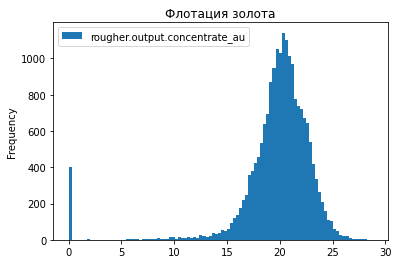

In [243]:
df_full.plot(kind='hist', y='rougher.output.concentrate_au', bins=100, title='Флотация золота')

<AxesSubplot:title={'center':'Флотация серебра'}, ylabel='Frequency'>

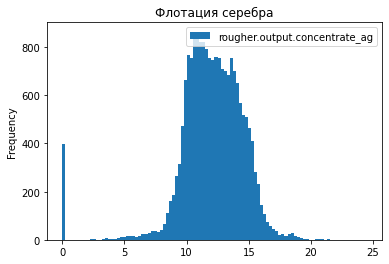

In [244]:
df_full.plot(kind='hist', y='rougher.output.concentrate_ag', bins=100, title='Флотация серебра')

<AxesSubplot:title={'center':'Флотация свинца'}, ylabel='Frequency'>

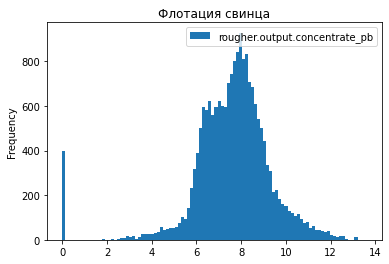

In [245]:
df_full.plot(kind='hist', y='rougher.output.concentrate_pb', bins=100, title='Флотация свинца')

<b>Primary cleaning stage</b>

<AxesSubplot:title={'center':'Первичная очистка золота'}, ylabel='Frequency'>

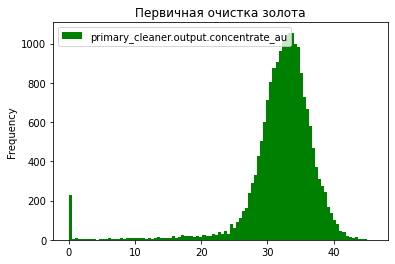

In [246]:
df_full.plot(kind='hist', y='primary_cleaner.output.concentrate_au', bins=100, title='Первичная очистка золота', color='green')

<AxesSubplot:title={'center':'Первичная очистка серебра'}, ylabel='Frequency'>

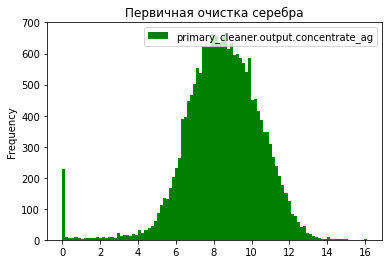

In [247]:
df_full.plot(kind='hist', y='primary_cleaner.output.concentrate_ag', bins=100, title='Первичная очистка серебра', color='green')

<AxesSubplot:title={'center':'Первичная очистка свинца'}, ylabel='Frequency'>

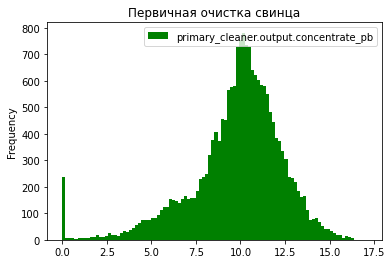

In [248]:
df_full.plot(kind='hist', y='primary_cleaner.output.concentrate_pb', bins=100, title='Первичная очистка свинца', color='green')

<b>Final stage</b>

<AxesSubplot:title={'center':'Финальны этап золота'}, ylabel='Frequency'>

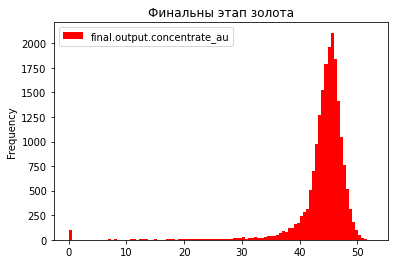

In [249]:
df_full.plot(kind='hist', y='final.output.concentrate_au', bins=100, title='Финальны этап золота', color='red')

<AxesSubplot:title={'center':'Финальны этап серебра'}, ylabel='Frequency'>

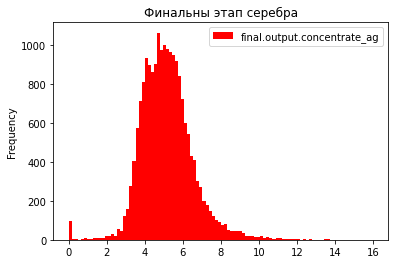

In [250]:
df_full.plot(kind='hist', y='final.output.concentrate_ag', bins=100, title='Финальны этап серебра', color='red')

<AxesSubplot:title={'center':'Финальны этап свинца'}, ylabel='Frequency'>

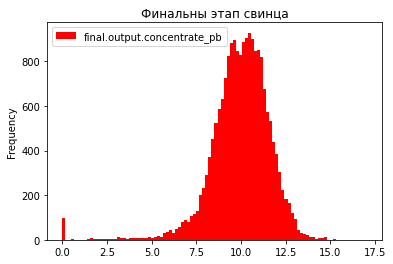

In [251]:
df_full.plot(kind='hist', y='final.output.concentrate_pb', bins=100, title='Финальны этап свинца', color='red')

<b>Output</b>

In principle we have a normal distribution. And we also see that the gold concentration increases at each subsequent stage, which is in principle logical

### Let's compare the size distributions of raw material granules on the training and test samples.

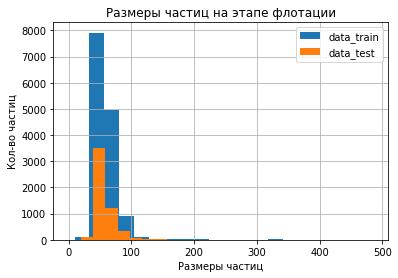

In [252]:
plt.hist(df_train['rougher.input.feed_size'], bins=20)
plt.hist(df_test['rougher.input.feed_size'], bins=20)
plt.grid(True)
plt.legend(['data_train', 'data_test'])
plt.xlabel('Размеры частиц');
plt.ylabel('Кол-во частиц');
plt.title('Размеры частиц на этапе флотации')

plt.show()

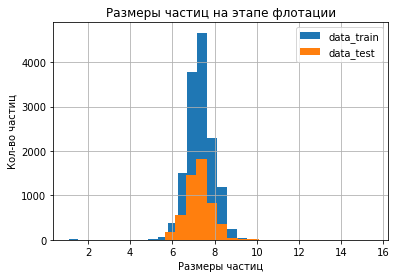

In [253]:
plt.hist(df_train['primary_cleaner.input.feed_size'], bins=20)
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=20)
plt.grid(True)
plt.legend(['data_train', 'data_test'])
plt.xlabel('Размеры частиц');
plt.ylabel('Кол-во частиц');
plt.title('Размеры частиц на этапе флотации')

plt.show()

<b>Output</b>

We have almost the same value of granules in the training and test sets

### We study the total concentration of all substances at different stages: in raw materials, in rough and final concentrates

/tmp/ipykernel_36/2690028577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum_rougher['rougher.output.sum'] = df_sum_rougher['rougher.output.concentrate_ag'] + df_sum_rougher['rougher.output.concentrate_pb'] + df_sum_rougher['rougher.output.concentrate_au'] + df_sum_rougher['rougher.output.concentrate_sol']


<AxesSubplot:title={'center':'Суммарная концентрация веществ на стадии флотации'}, ylabel='Frequency'>

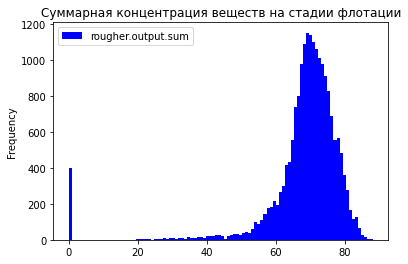

In [254]:
df_sum_rougher = df_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol']]
df_sum_rougher['rougher.output.sum'] = df_sum_rougher['rougher.output.concentrate_ag'] + df_sum_rougher['rougher.output.concentrate_pb'] + df_sum_rougher['rougher.output.concentrate_au'] + df_sum_rougher['rougher.output.concentrate_sol']
df_sum_rougher.plot(kind='hist', y='rougher.output.sum', bins=100, title='Суммарная концентрация веществ на стадии флотации', color='blue')

/tmp/ipykernel_36/339186216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum_primary['rougher.output.sum.primary'] = df_sum_primary['primary_cleaner.output.concentrate_ag'] + df_sum_primary['primary_cleaner.output.concentrate_pb'] + df_sum_primary['primary_cleaner.output.concentrate_au'] + df_sum_primary['primary_cleaner.output.concentrate_sol']


<AxesSubplot:title={'center':'Суммарная концентрация веществ на стадии первичной очистки'}, ylabel='Frequency'>

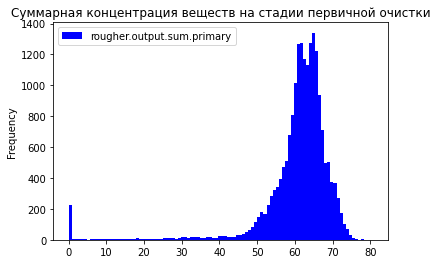

In [255]:
df_sum_primary = df_full[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_sol']]
df_sum_primary['rougher.output.sum.primary'] = df_sum_primary['primary_cleaner.output.concentrate_ag'] + df_sum_primary['primary_cleaner.output.concentrate_pb'] + df_sum_primary['primary_cleaner.output.concentrate_au'] + df_sum_primary['primary_cleaner.output.concentrate_sol']
df_sum_primary.plot(kind='hist', y='rougher.output.sum.primary', bins=100, title='Суммарная концентрация веществ на стадии первичной очистки', color='blue')

/tmp/ipykernel_36/357287951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum_final['rougher.output.sum.final'] = df_sum_final['final.output.concentrate_ag'] + df_sum_final['final.output.concentrate_pb'] + df_sum_final['final.output.concentrate_au'] + df_sum_final['final.output.concentrate_sol']


<AxesSubplot:title={'center':'Суммарная концентрация веществ на стадии финальной очистки'}, ylabel='Frequency'>

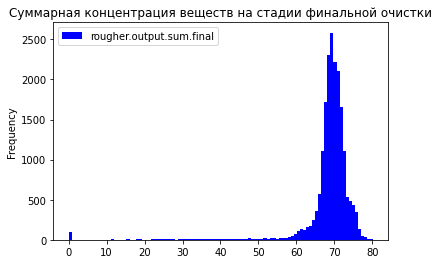

In [256]:
df_sum_final = df_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au','final.output.concentrate_sol']]
df_sum_final['rougher.output.sum.final'] = df_sum_final['final.output.concentrate_ag'] + df_sum_final['final.output.concentrate_pb'] + df_sum_final['final.output.concentrate_au'] + df_sum_final['final.output.concentrate_sol']
df_sum_final.plot(kind='hist', y='rougher.output.sum.final', bins=100, title='Суммарная концентрация веществ на стадии финальной очистки', color='blue')

Let’s remove from the training and test samples all objects where the total concentration of substances is zero

In [257]:
df_sum_rougher = df_sum_rougher[df_sum_rougher['rougher.output.sum'] == 0]
df_sum_primary = df_sum_primary[df_sum_primary['rougher.output.sum.primary'] == 0]
df_sum_final = df_sum_final[df_sum_final['rougher.output.sum.final'] == 0]

df_drop_index = [df_sum_rougher.index, df_sum_primary.index, df_sum_final.index]
datas = [df_train, df_test]

for i in df_drop_index:
    for j in i:
        if j in df_train.index:
            df_train = df_train.drop(j)
        if j in df_test.index:
            df_test = df_test.drop(j)


In [258]:
df_test.shape, df_train.shape

((5123, 54), (13725, 54))

### Conclusion

At the final stage of purification, the total concentration of substances has practically no emissions and is at a high level

## Model

### Let's write a function to calculate the final sMAPE.

In [259]:
def symmetric_mean_absolute_percentage_error(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final): 
    return 0.25 * (100 / len(df_full) * np.sum(2 * np.abs(y_true_rougher - y_pred_rougher) / (np.abs(y_true_rougher) + np.abs(y_pred_rougher)))) + 0.75 * (100 / len(df_full) * np.sum(2 * np.abs(y_true_final - y_pred_final) / (np.abs(y_true_final) + np.abs(y_pred_final))))

### Let's train different models and evaluate their quality using cross-validation.

In [260]:
features_train_rougher = df_train.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = df_train['rougher.output.recovery']
features_test_rougher = df_test.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = df_test['rougher.output.recovery']

features_train_final = df_train.drop(['final.output.recovery'], axis=1)
target_train_final = df_train['final.output.recovery']
features_test_final = df_test.drop(['final.output.recovery'], axis=1)
target_test_final = df_test['final.output.recovery']

<b>Model: Decision tree</b>

In [261]:
model_decision_tree_rougher = DecisionTreeRegressor(random_state=12345, )
cross_val_score_rougher = cross_val_score(model_decision_tree_rougher, features_train_rougher, target_train_rougher, cv=5)
final_score_rougher = cross_val_score_rougher.sum() / cross_val_score_rougher.shape[0]
print('cross_val_score:', final_score_rougher)
model_decision_tree_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_decision_tree_rougher.predict(features_test_rougher)

model_decision_tree_final = DecisionTreeRegressor(random_state=12345)
cross_val_score_final = cross_val_score(model_decision_tree_final, features_train_final, target_train_final, cv=5)
final_score_final = cross_val_score_final.sum() / cross_val_score_final.shape[0]
print('cross_val_score:', final_score_final)
model_decision_tree_final.fit(features_train_final, target_train_final)
predicted_final = model_decision_tree_final.predict(features_test_final)

print('Итоговое sMAPE:', 
    symmetric_mean_absolute_percentage_error(target_test_rougher, predicted_rougher, 
    target_test_final, predicted_final))

cross_val_score: -0.48237770534276897
cross_val_score: -1.2582353691715515
Итоговое sMAPE: 2.9929592553282705


<b>Model: Random Forest</b>

In [262]:
model_random_forest_rougher = RandomForestRegressor(random_state=12345)
cross_val_score_rougher = cross_val_score(model_random_forest_rougher, features_train_rougher, target_train_rougher, cv=5)
final_score_rougher = cross_val_score_rougher.sum() / cross_val_score_rougher.shape[0]
print('cross_val_score:', final_score_rougher)
model_random_forest_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_random_forest_rougher.predict(features_test_rougher)

model_random_forest_final = RandomForestRegressor(random_state=12345)
cross_val_score_final = cross_val_score(model_random_forest_final, features_train_final, target_train_final, cv=5)
final_score_final = cross_val_score_final.sum() / cross_val_score_final.shape[0]
print('cross_val_score:', final_score_final)
model_random_forest_final.fit(features_train_final, target_train_final)
predicted_final = model_random_forest_final.predict(features_test_final)

print('Итоговое sMAPE:', 
    symmetric_mean_absolute_percentage_error(target_test_rougher, predicted_rougher, 
    target_test_final, predicted_final))

cross_val_score: 0.2863531140869893
cross_val_score: 0.0871580911638475
Итоговое sMAPE: 2.697918471801014


<b>Model: Linear Regression</b>

In [263]:
model_logistic_rougher = LinearRegression()
cross_val_score_rougher = cross_val_score(model_logistic_rougher, features_train_rougher, target_train_rougher, cv=5)
final_score_rougher = cross_val_score_rougher.sum() / cross_val_score_rougher.shape[0]
print('cross_val_score:', final_score_rougher)
model_logistic_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_logistic_rougher.predict(features_test_rougher)

model_logistic_final = LinearRegression()
cross_val_score_final = cross_val_score(model_logistic_final, features_train_final, target_train_final, cv=5)
final_score_final = cross_val_score_final.sum() / cross_val_score_final.shape[0]
print('cross_val_score:', final_score_final)
model_logistic_final.fit(features_train_final, target_train_final)
predicted_rougher = model_logistic_final.predict(features_test_final)

print('Итоговое sMAPE:', 
    symmetric_mean_absolute_percentage_error(target_test_rougher, predicted_rougher, 
    target_test_final, predicted_final))

cross_val_score: 0.11392523157727703
cross_val_score: 0.2894483293971798
Итоговое sMAPE: 11.15253637701447


The best model is Random Forest with Final sMAPE 2.7

<b>Let's check the model for adequacy using DummyRegressor</b>

In [270]:
model_DummyRegressor_rougher = DummyRegressor(strategy="mean")
cross_val_score_rougher = cross_val_score(model_DummyRegressor_rougher, features_train_rougher, target_train_rougher, cv=5)
final_score_rougher = cross_val_score_rougher.sum() / cross_val_score_rougher.shape[0]
print('cross_val_score:', final_score_rougher)
model_DummyRegressor_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_DummyRegressor_rougher.predict(features_test_rougher)

model_DummyRegressor_final = DummyRegressor(strategy="mean")
cross_val_score_final = cross_val_score(model_DummyRegressor_final, features_train_final, target_train_final, cv=5)
final_score_final = cross_val_score_final.sum() / cross_val_score_final.shape[0]
print('cross_val_score:', final_score_final)
model_DummyRegressor_final.fit(features_train_final, target_train_final)
predicted_final = model_DummyRegressor_final.predict(features_test_final)

print('Итоговое sMAPE:', 
    symmetric_mean_absolute_percentage_error(target_test_rougher, predicted_rougher, 
    target_test_final, predicted_final))

cross_val_score: -0.37276636453001544
cross_val_score: -0.08134243611038094
Итоговое sMAPE: 2.0498560571056244


## Final comment

We analyzed data from three samples of gold mining industry data.

After working through the samples, we found how the concentration of metals (Au, Ag, Pb) changes at different stages of purification

We built various models to calculate sMAPE. The best model for our task was the model: Random Forest with an indicator of 2.7

We also checked the model for adequacy using DummyRegressor. sMAPE - 2.05